In [30]:
from sampling import *
import numpy as np
import matplotlib.pyplot as plt

In [31]:
def empirical_char_function(t, N = 1000):
  data = sample_s_distribution(alpha, 1, N)

  t_matrix = t[:, np.newaxis]
  data_matrix = data[np.newaxis, :]

  exp_matrix = np.exp(1j * t_matrix * data_matrix)
  phi = np.mean(exp_matrix, axis=1)

  return phi

In [32]:
def cms_char_function(t, alpha=1, beta=1):
  abs_t = np.absolute(t)
  sgn_t = np.sign(t)
  kappa = 1 - abs(1 - alpha)
  return np.exp(-np.power(abs_t, alpha) * np.exp(-0.5 * np.pi * 1j * beta * kappa * sgn_t))

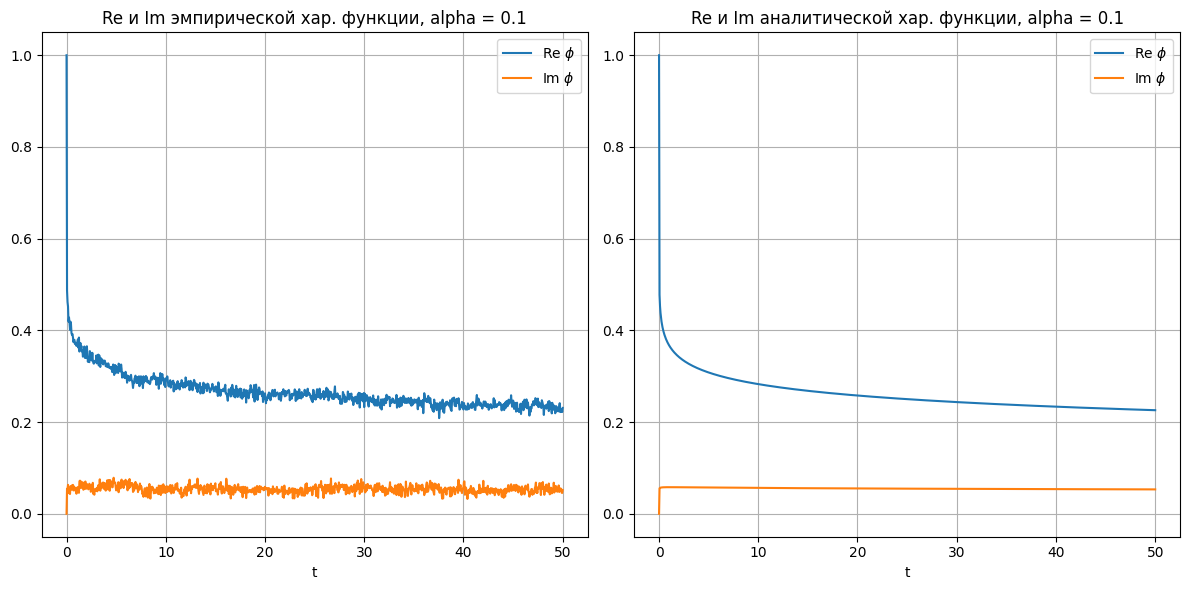

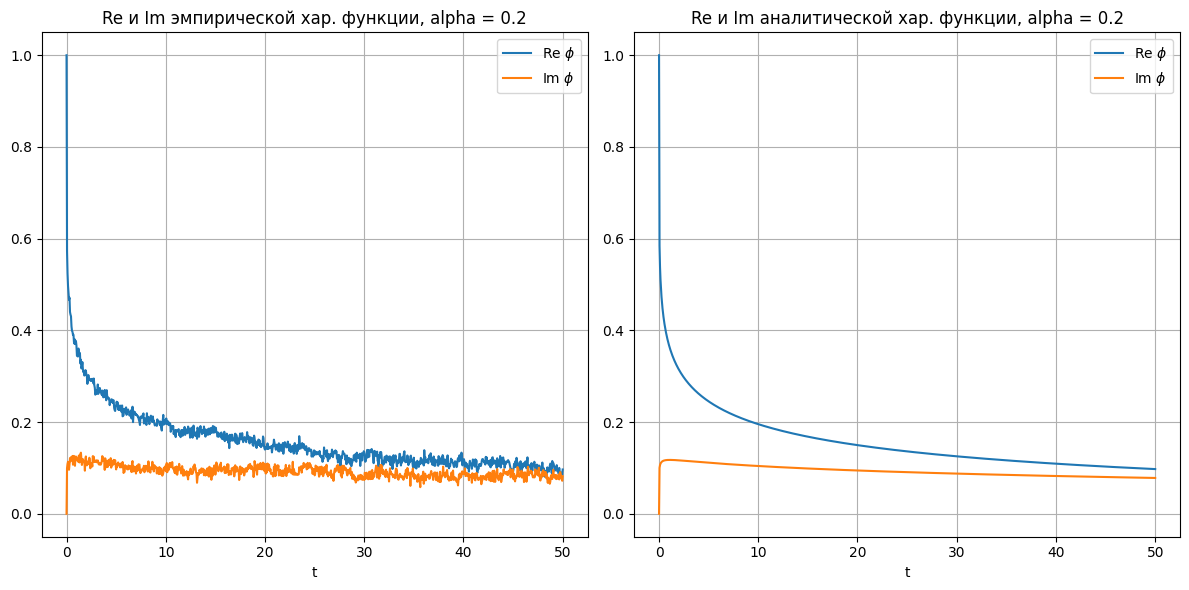

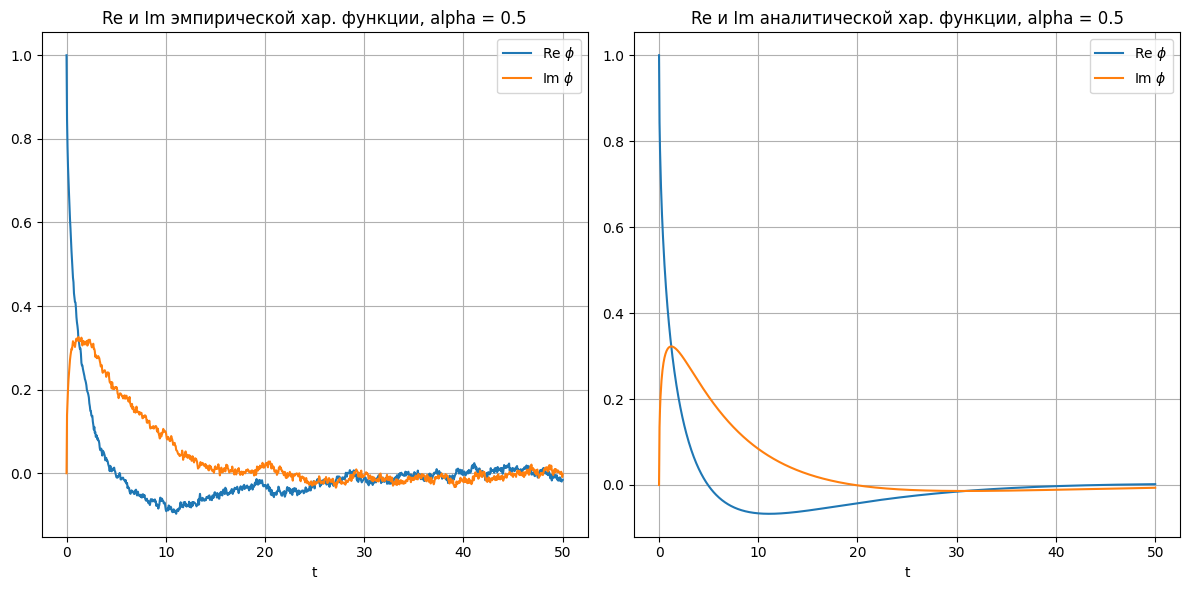

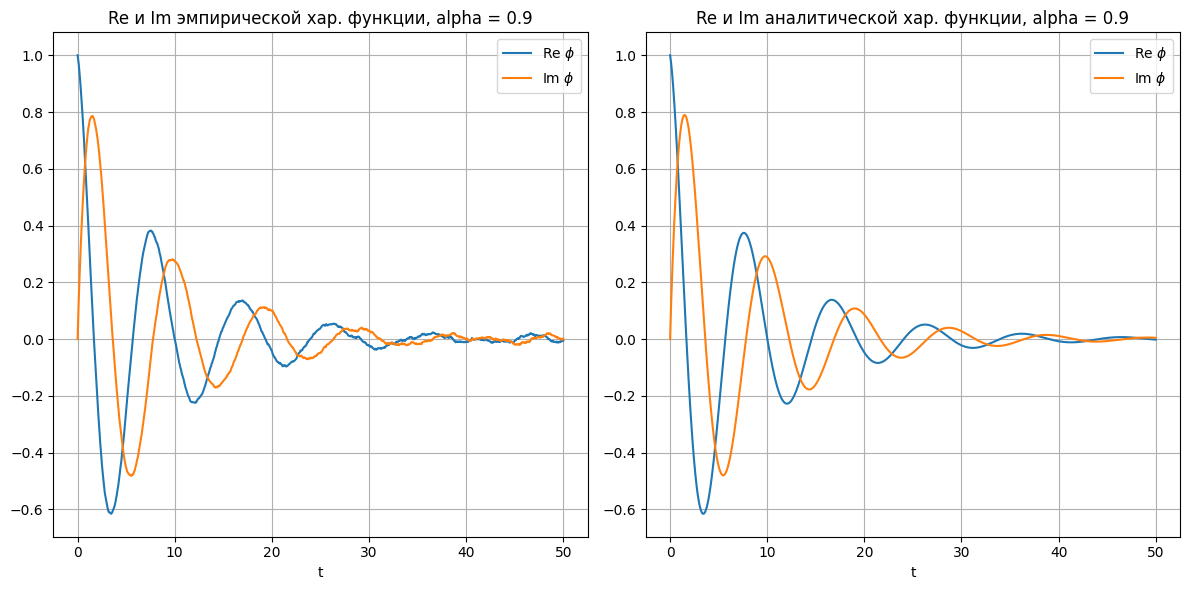

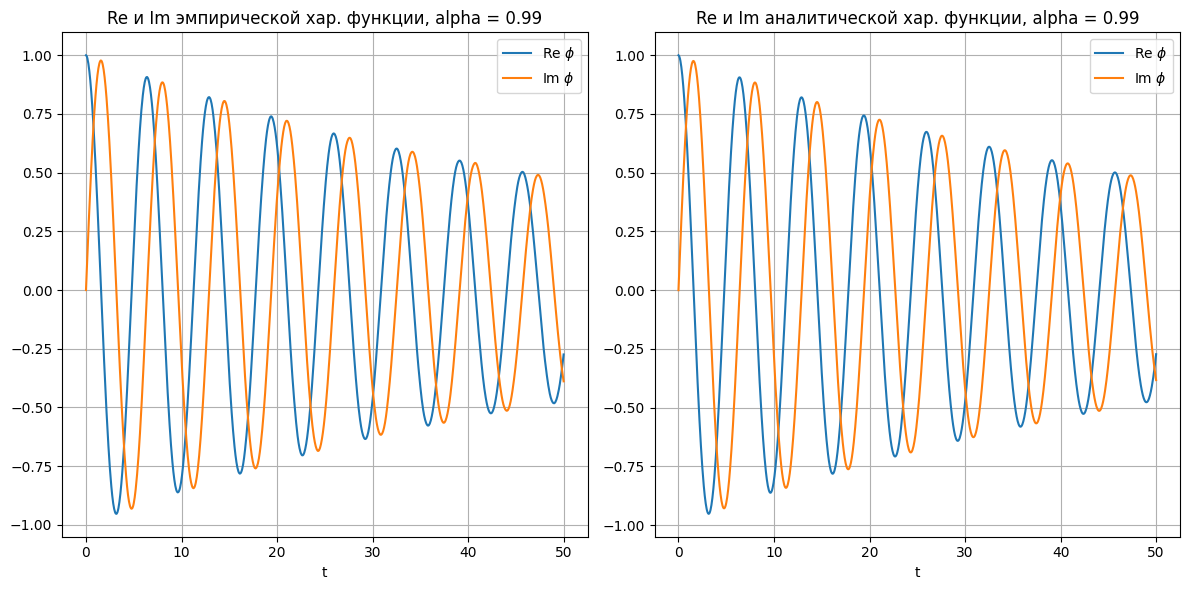

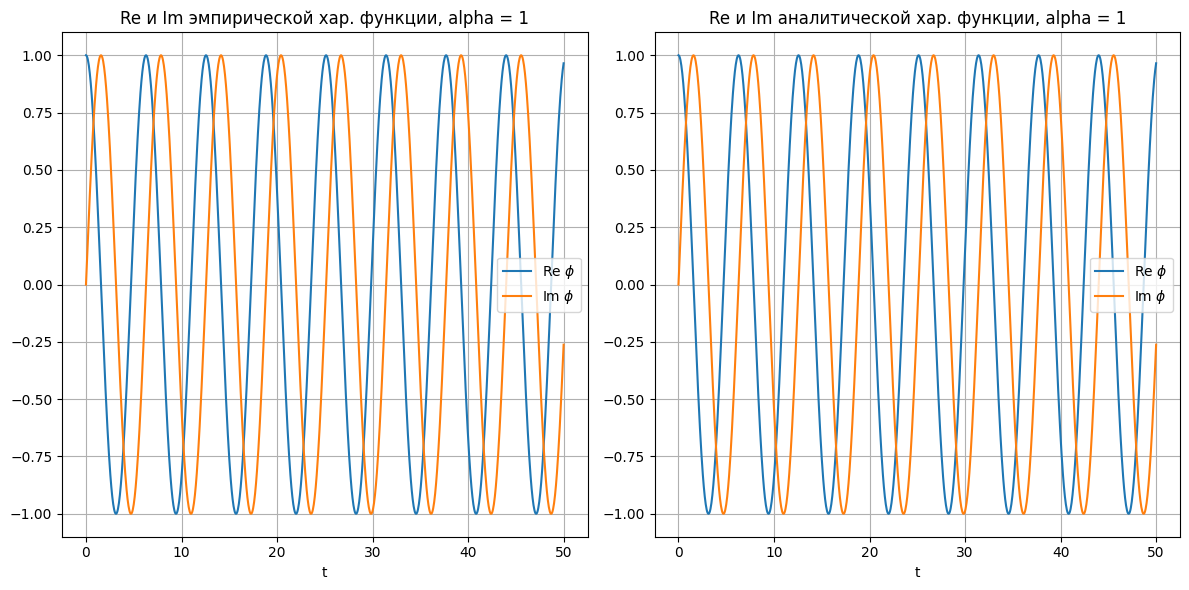

In [43]:
t_min = 0
t_max = 50
dt = 0.05

t = np.arange(t_min, t_max + dt, dt)
for alpha in [0.1, 0.2, 0.5, 0.9, 0.99, 1]:
  empirical = empirical_char_function(t, N = 5000)
  analytic = cms_char_function(t, alpha = alpha, beta = 1)

  plt.figure(figsize=(12, 6))

  plt.subplot(121)
  plt.plot(t, np.real(empirical), label='Re $\phi$')
  plt.plot(t, np.imag(empirical), label='Im $\phi$')
  plt.title(f'Re и Im эмпирической хар. функции, alpha = {alpha}')
  plt.xlabel('t')
  plt.grid(True)
  plt.legend()

  plt.subplot(122)
  plt.plot(t, np.real(analytic), label=f'Re $\phi$')
  plt.plot(t, np.imag(analytic), label='Im $\phi$')
  plt.title(f'Re и Im аналитической хар. функции, alpha = {alpha}')
  plt.xlabel('t')
  plt.grid(True)
  plt.legend()

  plt.tight_layout()
  plt.show()